<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/homework2/HW2_Task2_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
#### CREDITS: Wencen Wu ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

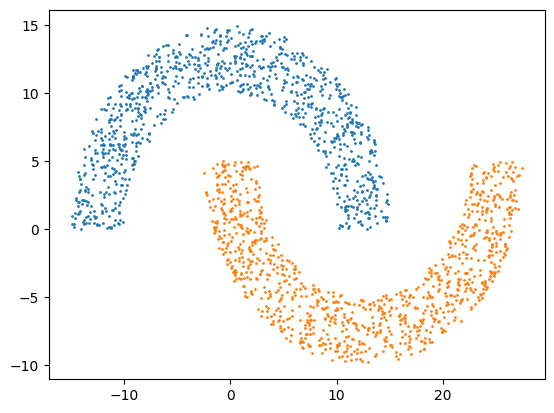

In [150]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,2000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]
y_class_top = [1 for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]
y_class_bottom = [-1 for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [151]:
x1 = X1 + X2
x2 = Y1 + Y2
y = y_class_top + y_class_bottom

df = pd.DataFrame({'X1': x1, 'X2': x2, 'Y':y})
df.insert(0,"X0",[1.0 for i in range(len(y))])

print(df)

       X0         X1         X2  Y
0     1.0 -11.969963   5.306403  1
1     1.0 -13.625746   4.098373  1
2     1.0  -1.376156  11.315018  1
3     1.0   3.664358  10.310686  1
4     1.0   6.372151   8.565436  1
...   ...        ...        ... ..
1995  1.0  24.608689  -3.171815 -1
1996  1.0   1.199132  -0.364948 -1
1997  1.0  18.117099  -6.165541 -1
1998  1.0   2.573395   2.335340 -1
1999  1.0   5.463440  -7.237365 -1

[2000 rows x 4 columns]


In [152]:
# def get_sign(x, w):
#   dot_product = (x[0]*w[0] + x[1]*w[1] + x[2]*w[2])
#   return sign(dot_product)

# def sign(x):
#   if(x>=0):
#     return 1
#   else:
#     return -1

In [153]:
# Plot Ein vs Iteration
def plot_Ein_iteration():
    plt.plot(Ein_list)
    plt.xlabel('Iterations')
    plt.ylabel('$E_{in}$')
    plt.title('In-Sample Error vs Iterations')
    plt.show()

# plot_Ein_iteration()

In [154]:
# def plot_graph_3rd(w, msg):
#   axes = plt.gca()
#   xlims = axes.get_xlim()
#   ylims = axes.get_ylim()
#   x1 = np.linspace(xlims[0], xlims[1], 100)
#   x2 = np.linspace(ylims[0], ylims[1], 100)
#   # meshgrid
#   XM1, XM2 = np.meshgrid(x1, x2)
#   def f(x1, x2, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9):
#     return w0 + w1*x1 + w2*(x2) + w3*(x1*x2) + w4*(x1**2) + w5*(x2**2) + w6*((x1**2)*x2) + w7*((x2**2)*x1) + w8*(x1**3) + w9*(x2**3)
#   plt.contour(XM1, XM2, f(XM1, XM2, w[0], w[1], w[2], w[3], w[4], w[5], w[6], w[7], w[8], w[9]), 1, colors = 'blue')


In [155]:
color_1 = np.where(df["Y"]==1, "red", "blue")
def plot3poly(w0,w1,w2,w3,w4,w5,w6,w7,w8,w9, color='red'):
    plt.scatter(list(df['X1']), list(df['X2']), c=color_1)
    axes = plt.gca()
    xlims = axes.get_xlim()
    ylims = axes.get_ylim()
    x1 = np.linspace(xlims[0], xlims[1], 1000)
    x2 = np.linspace(ylims[0], ylims[1], 1000)

    # meshgrid
    XM1, XM2 = np.meshgrid(x1, x2)
    Z = w0 + w1*XM1 + w2*XM2 + w3*XM1*XM2 + w4*XM1**2 + w5*XM2**2 + w6*XM1**3 + w7*XM2**3 + w8*XM1**2*XM2 + w9*XM1*XM2**2
    plt.contour(XM1, XM2, Z, 1, colors=color)


Pocket
Ein 0.12201099999999991
This is the final weight:  [ 1.00000000e+00 -2.09187283e+00  1.17139877e+01  3.64818162e+01
  1.51376281e+02  1.21961426e+02 -5.81426411e+02  1.26314054e+03
  9.98572415e+02  6.50108797e+02]


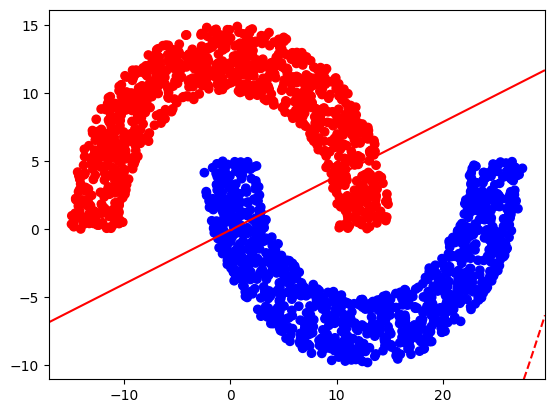

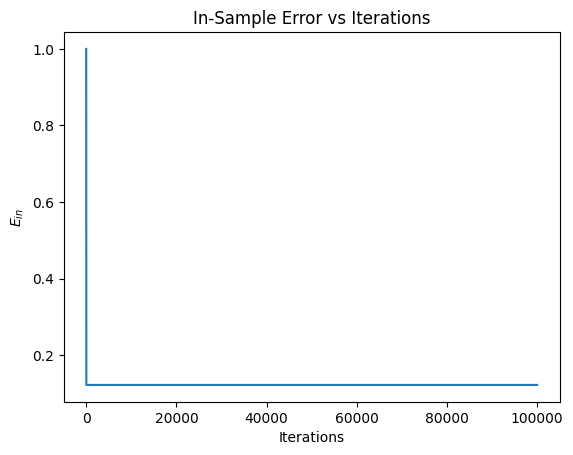

In [159]:
# TASK 2 HP e) 3rd order polynomial

df['x1*x2'] = df['X1']*df['X2']
df['x1^2'] = df['X1']**2
df['x2^2'] = df['X2']**2
df['x1^3'] = df['X1']**3
df['x2^3'] = df['X2']**3
df['x1^2*x2'] = df['X1']**2 * df['X2']
df['x1*x2^2'] = df['X1'] * df['X2']**2

cols = [col for col in df if col != 'Y'] + ['Y']
df = df[cols]

# print(df)

Ein_list = []

def pocketAlgo_3rd(misclassified_method, w_pocket):
  misclassified = misclassified_method(w_pocket)
  i=0
  w_maybeNew = w_pocket

  while(len(misclassified)!=0 and i<100000):
      list_of_misclass = random.choice(list(misclassified))
      Ein = len(misclassified)/len(df)
      Ein_list.append(Ein)

      x = df.iloc[list_of_misclass, :-1].values
      y = df.iloc[list_of_misclass, -1]

      w_maybeNew = w_maybeNew + x*y

      misclassified_new = misclassified_method(w_maybeNew)

      if len(misclassified_new) <= len(misclassified):
          w_pocket = w_maybeNew
          misclassified = misclassified_new

      else:
          misclassified = misclassified_method(w_pocket)
      i=i+1


  print("Pocket")
  print("Ein",np.mean(Ein_list))
  print("This is the final weight: ",w_pocket)

  # plt.scatter(X1, Y1,s = 1)
  # plt.scatter(X2, Y2,s = 1)
  plot3poly(*w_pocket, 'red')

# print(df)

def check_for_misclassified_3rd(w):
  misclassified = {}
  signs = np.sign(df.iloc[:, :-1].values @ w)
  y = df.iloc[:, -1].values

  mismatches = np.where(signs != y)[0]
  for mismatch in mismatches:
      misclassified[mismatch] = signs[mismatch]
  return misclassified


w_pocket = [0,0,0,0,0,0,0,0,0,0]
pocketAlgo_3rd(check_for_misclassified_3rd, w_pocket)
plt.show()
plot_Ein_iteration()

#plot_graph_3rd(w_pocket, "Pocket 3rd")

<ipython-input-157-b03174968576>:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)), np.transpose(X)), Y)


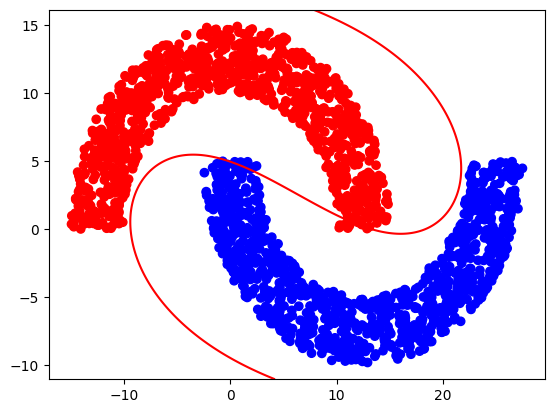

In [157]:
# LR for 3rd order

def linearRegression(X, Y):
  w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)), np.transpose(X)), Y)
  return w

X = df.drop(columns=['Y'])
y = df['Y']
w_linear_regression = linearRegression(X, y)

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plot3poly(w_linear_regression[0],w_linear_regression[1],w_linear_regression[2],w_linear_regression[3],w_linear_regression[4],w_linear_regression[5],w_linear_regression[6],w_linear_regression[7],w_linear_regression[8],w_linear_regression[9])
plt.show()
